# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Raw Data and converting it to a cleaned data

In [3]:
data = pd.read_csv('demo-data.csv')

In [4]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [5]:
data.shape

(278848, 10)

In [6]:
# drop test-date column, as it wont affect the predictions
data.drop("test_date",axis=1,inplace=True)

In [7]:
# drop all values of each column which are not digit
data = data[data['cough'].apply(lambda x: str(x).isdigit())]
data = data[data['fever'].apply(lambda x: str(x).isdigit())]
data = data[data['sore_throat'].apply(lambda x: str(x).isdigit())]
data = data[data['shortness_of_breath'].apply(lambda x: str(x).isdigit())]
data = data[data['head_ache'].apply(lambda x: str(x).isdigit())]

# final_data is our main data
final_data = data

In [8]:
final_data.shape

(278594, 9)

In [9]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other


# EDA

Getting to know Data

In [10]:
display("Data to deal", final_data)

'Data to deal'

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,negative,None,None,Other
278844,0,0,0,0,0,negative,None,None,Other
278845,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,0,0,0,0,0,other,None,None,Other


In [11]:
#size of Data
display("Shape of dataset")
print("Rows:",final_data.shape[0],"\nColumns:",final_data.shape[1])

'Shape of dataset'

Rows: 278594 
Columns: 9


In [12]:
#checking for the Null values
display('NULL Values', final_data.isnull().sum())

'NULL Values'

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [13]:
display("Description",final_data.describe())

'Description'

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278594,278594,278594,278594,278594,278594,278594,278594,278594
unique,4,4,4,4,4,3,3,3,3
top,0,0,0,0,0,negative,None,female,Other
freq,121649,133941,260423,260838,259841,260008,127315,130030,242504


In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cough                278594 non-null  object
 1   fever                278594 non-null  object
 2   sore_throat          278594 non-null  object
 3   shortness_of_breath  278594 non-null  object
 4   head_ache            278594 non-null  object
 5   corona_result        278594 non-null  object
 6   age_60_and_above     278594 non-null  object
 7   gender               278594 non-null  object
 8   test_indication      278594 non-null  object
dtypes: object(9)
memory usage: 21.3+ MB


In [15]:
#checking Distrubution of Data
for i in final_data.columns:
    print("\nColumn Name:",i,"-->",final_data[i].unique(),"-->Unique Count",len(final_data[i].unique()))


Column Name: cough --> [0 1 '0' '1'] -->Unique Count 4

Column Name: fever --> [0 1 '0' '1'] -->Unique Count 4

Column Name: sore_throat --> [0 1 '0' '1'] -->Unique Count 4

Column Name: shortness_of_breath --> [0 1 '0' '1'] -->Unique Count 4

Column Name: head_ache --> [0 1 '0' '1'] -->Unique Count 4

Column Name: corona_result --> ['negative' 'positive' 'other'] -->Unique Count 3

Column Name: age_60_and_above --> ['None' 'Yes' 'No'] -->Unique Count 3

Column Name: gender --> ['female' 'male' 'None'] -->Unique Count 3

Column Name: test_indication --> ['Other' 'Abroad' 'Contact with confirmed'] -->Unique Count 3


In [16]:
# convert data types of column stated in convert_dict
convert_dict = {'cough': int, 
                'fever': int, 
                'sore_throat': int, 
                'shortness_of_breath': int, 
                'head_ache': int}
final_data = final_data.astype(convert_dict)

In [17]:
for i in final_data.columns:
    print("\nColumn Name:",i,"-->",final_data[i].unique(),"-->Unique Count",len(final_data[i].unique()))


Column Name: cough --> [0 1] -->Unique Count 2

Column Name: fever --> [0 1] -->Unique Count 2

Column Name: sore_throat --> [0 1] -->Unique Count 2

Column Name: shortness_of_breath --> [0 1] -->Unique Count 2

Column Name: head_ache --> [0 1] -->Unique Count 2

Column Name: corona_result --> ['negative' 'positive' 'other'] -->Unique Count 3

Column Name: age_60_and_above --> ['None' 'Yes' 'No'] -->Unique Count 3

Column Name: gender --> ['female' 'male' 'None'] -->Unique Count 3

Column Name: test_indication --> ['Other' 'Abroad' 'Contact with confirmed'] -->Unique Count 3


# Plot


<AxesSubplot:xlabel='corona_result', ylabel='count'>

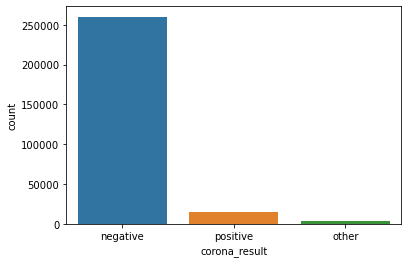

In [18]:
# frequency plot of corona_result
sns.countplot(final_data['corona_result'])

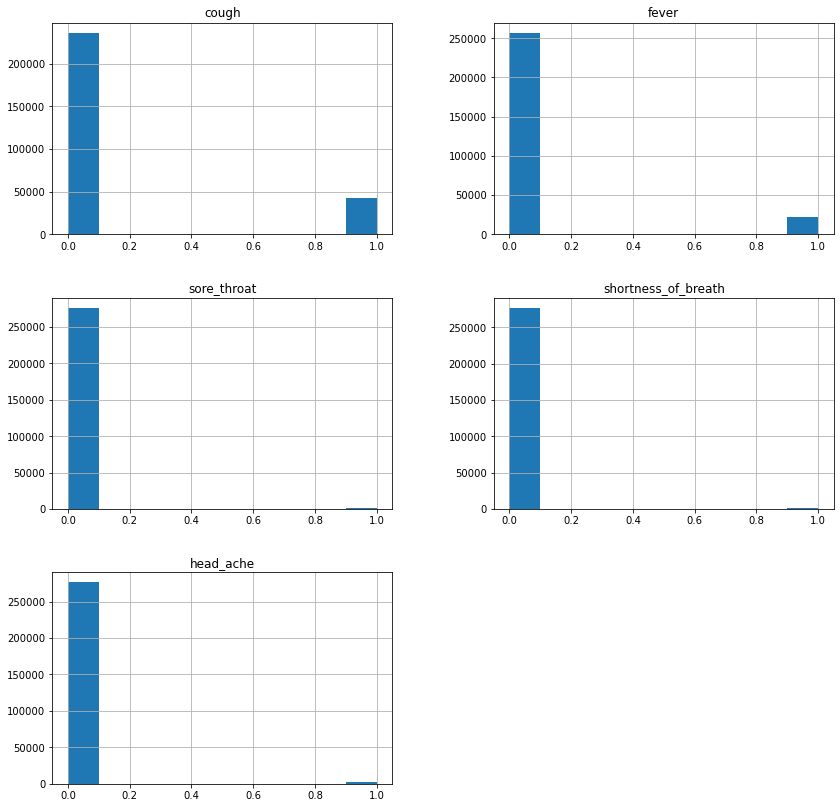

In [19]:
# frequency plot of different numeric features
final_data.hist(figsize = (14,14))
plt.show()

<AxesSubplot:xlabel='fever', ylabel='corona_result'>

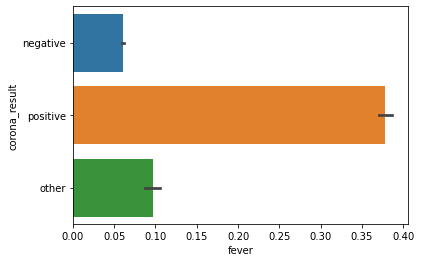

In [20]:
# target(corona_result) v/s feature plots
sns.barplot(final_data['fever'], final_data['corona_result'])

<AxesSubplot:xlabel='shortness_of_breath', ylabel='corona_result'>

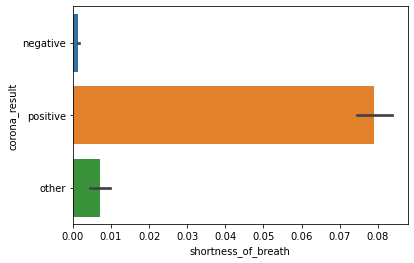

In [21]:
sns.barplot(final_data['shortness_of_breath'], final_data['corona_result'])

# Preprocessing

In [22]:
# label encoding on columns having more than 1 value
le = preprocessing.LabelEncoder()
final_data['corona_result'] = le.fit_transform(final_data['corona_result'])
final_data['gender'] = le.fit_transform(final_data['gender'])
final_data['age_60_and_above'] = le.fit_transform(final_data['age_60_and_above'])
final_data['test_indication'] = le.fit_transform(final_data['test_indication'])

In [23]:
final_data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,0,1,1,2
2,0,1,0,0,0,0,1,2,2
3,1,0,0,0,0,0,1,1,2
4,1,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1,0,2
278844,0,0,0,0,0,0,1,0,2
278845,0,0,0,0,0,2,1,0,1
278846,0,0,0,0,0,1,1,0,2


In [25]:
for i in final_data.columns:
    print("\nColumn Name:",i,"-->",final_data[i].unique(),"-->Unique Count",len(final_data[i].unique()))


Column Name: cough --> [0 1] -->Unique Count 2

Column Name: fever --> [0 1] -->Unique Count 2

Column Name: sore_throat --> [0 1] -->Unique Count 2

Column Name: shortness_of_breath --> [0 1] -->Unique Count 2

Column Name: head_ache --> [0 1] -->Unique Count 2

Column Name: corona_result --> [0 2 1] -->Unique Count 3

Column Name: age_60_and_above --> [1 2 0] -->Unique Count 3

Column Name: gender --> [1 2 0] -->Unique Count 3

Column Name: test_indication --> [2 0 1] -->Unique Count 3


# Model

In [26]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,0,1,1,2
2,0,1,0,0,0,0,1,2,2
3,1,0,0,0,0,0,1,1,2
4,1,0,0,0,0,0,1,2,2


In [27]:
# now target is y and features in X
y = final_data['corona_result']
X = final_data.drop(['corona_result'], axis = 1)

In [28]:

X


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,1,1,2
2,0,1,0,0,0,1,2,2
3,1,0,0,0,0,1,1,2
4,1,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,0,2
278844,0,0,0,0,0,1,0,2
278845,0,0,0,0,0,1,0,1
278846,0,0,0,0,0,1,0,2


In [29]:
y


0         0
1         0
2         0
3         0
4         0
         ..
278843    0
278844    0
278845    2
278846    1
278847    0
Name: corona_result, Length: 278594, dtype: int32

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# K-Nearest Neighbors

In [31]:
# this will be used to plot accuracy of different alogrithms
scores_dict = {}

In [32]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
pred = classifier.predict(X_test) 
accuracy_knn = accuracy_score(y_test, pred)
print("KNN accuracy_score: ", accuracy_knn)
scores_dict['K-NearestNeighbors'] = accuracy_knn * 100

KNN accuracy_score:  0.9545397440729374


# Random Forest Classifier

In [34]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)
predRandomForest = RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, predRandomForest)
print('RandomForest accuracy_score: ', accuracy_rf)
scores_dict['RandomForestClassifier'] = accuracy_rf * 100

RandomForest accuracy_score:  0.9565318831996267


<AxesSubplot:xlabel='corona_result', ylabel='Density'>

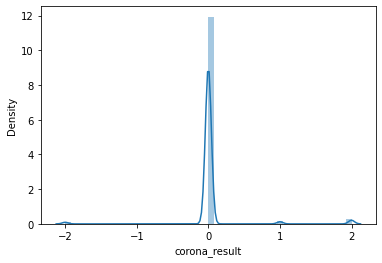

In [35]:
sns.distplot(y_test-pred)

# Decision Tree Classifier

In [36]:
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
pred = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred)
print('DecisionTree accuracy_score: ', accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt * 100

DecisionTree accuracy_score:  0.9565498303989662


In [37]:
scores_dict

{'K-NearestNeighbors': 95.45397440729374,
 'RandomForestClassifier': 95.65318831996267,
 'DecisionTreeClassifier': 95.65498303989662}

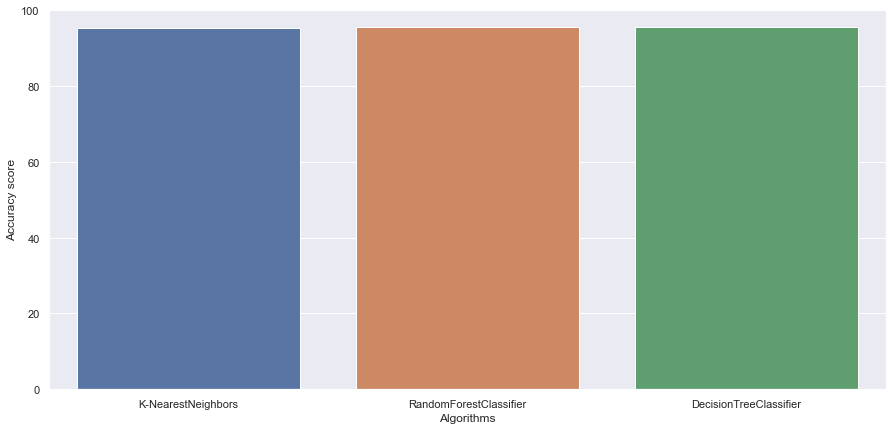

In [38]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)